In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import  Image #intall pillow library
import seaborn as sns#visualization
import itertools
import warnings
import io
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [2]:
os.chdir(r"C:\Users\shars\OneDrive\Desktop\python_workspace\projects\churn")

In [5]:
#read training data
df_train=pd.read_csv("Train_data.csv")

In [6]:
#read test data
df_test=pd.read_csv("Test_data.csv")

In [38]:
#dropping phone number column
df=df.drop(["phone number"],axis=1)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes           

In [11]:
#so there are no missing values, now lets have a look at summary of data
df_train.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
df_test.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000
mean,98.646671,436.369526,7.067786,181.316197,99.217157,30.824337,199.949190,100.344331,16.995903,199.431074,99.542292,8.974559,10.310738,4.346731,2.784421,1.585483
std,39.400755,41.890588,13.235274,52.732174,19.327148,8.964421,50.232869,19.637935,4.269758,50.437010,20.717441,2.269604,2.699660,2.446252,0.728764,1.288179
min,1.000000,408.000000,0.000000,6.600000,34.000000,1.120000,22.300000,38.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,408.000000,0.000000,143.750000,86.000000,24.440000,165.900000,88.000000,14.100000,166.600000,86.000000,7.500000,8.600000,3.000000,2.320000,1.000000
50%,98.000000,415.000000,0.000000,181.000000,99.000000,30.770000,200.400000,100.000000,17.030000,199.400000,99.000000,8.970000,10.400000,4.000000,2.810000,1.000000
75%,126.000000,415.000000,0.000000,215.750000,112.000000,36.680000,232.300000,113.000000,19.745000,233.050000,113.000000,10.490000,12.000000,5.000000,3.240000,2.000000
max,238.000000,510.000000,52.000000,351.500000,160.000000,59.760000,359.300000,169.000000,30.540000,381.600000,170.000000,17.170000,19.700000,19.000000,5.320000,7.000000


In [16]:
#phone number is not important so we are gonna drop that column from both datafram train as well as test
df_train=df_train.drop(["phone number"],axis=1)
df_test=df_test.drop(["phone number"],axis=1)

In [17]:
#now we will have a look at number of unique data or categories present in columns
df_train.nunique()

state                              51
account length                    212
area code                           3
international plan                  2
voice mail plan                     2
number vmail messages              46
total day minutes                1667
total day calls                   119
total day charge                 1667
total eve minutes                1611
total eve calls                   123
total eve charge                 1440
total night minutes              1591
total night calls                 120
total night charge                933
total intl minutes                162
total intl calls                   21
total intl charge                 162
number customer service calls      10
Churn                               2
dtype: int64

In [19]:
#from the above look we can see that "area code","international plan" and "voice mail plan" are categorical variables or they could be transformed into one
#lets change the data types of above mentioned variables
cat_cols=["area code","international plan","voice mail plan","Churn"]
for i in cat_cols:
    df_train[i]=df_train[i].astype("category")
    df_test[i]=df_test[i].astype("category")
    print(i," ",df_train[i].dtypes," ",df_test[i].dtypes)

area code   category   category
international plan   category   category
voice mail plan   category   category
Churn   category   category


In [20]:
#lets have a complete look at data types of our dataframe
df_train.dtypes

state                              object
account length                      int64
area code                        category
international plan               category
voice mail plan                  category
number vmail messages               int64
total day minutes                 float64
total day calls                     int64
total day charge                  float64
total eve minutes                 float64
total eve calls                     int64
total eve charge                  float64
total night minutes               float64
total night calls                   int64
total night charge                float64
total intl minutes                float64
total intl calls                    int64
total intl charge                 float64
number customer service calls       int64
Churn                            category
dtype: object

In [21]:
#now we will give categorical codes to these category column so that to convert it to numerical form to be able to be processed by our model algorithm
for i in cat_cols:
    df_train[i]=df_train[i].cat.codes
    df_test[i]=df_test[i].cat.codes

In [26]:
df_train["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [28]:
df_test.head()#train.head

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,HI,101,2,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,MT,137,2,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,OH,103,0,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,NM,99,1,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,SC,108,1,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


In [44]:
#lets divide datdframe into two parts ,churn and non churn , to visualize data better
churn     = df[df["Churn"].str.strip()== "True."]
churn["Churn"]=churn["Churn"].str.strip().replace({"True.":"Yes"})
not_churn = df[df["Churn"].str.strip()== "False."]
not_churn["Churn"]=not_churn["Churn"].str.strip().replace({"False.":"No"})

In [42]:
print("churn % = ",len(churn)/len(df)*100,"  not churn % = ",len(not_churn)/len(df)*100)


churn % =  14.491449144914492   not churn % =  85.5085508550855


In [45]:
#we can see we have a pretty much imbalanced data here, we will try to balance later.
churn.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
10,IN,65,415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,Yes
15,NY,161,415,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,Yes
21,CO,77,408,no,no,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,Yes
33,AZ,12,408,no,no,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,Yes
41,MD,135,408,yes,yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,Yes


In [46]:
not_churn.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,No
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,No
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,No
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,No
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,No


In [49]:
target_col = ["Churn"]
target_col

['Churn']

In [51]:
cat_cols   = [x for x in cat_cols if x not in target_col]
cat_cols

['area code', 'international plan', 'voice mail plan']

In [56]:
df_train=df_train.drop(["state"],axis=1)
df_test=df_test.drop(["state"],axis=1)
churn=churn.drop(["state"],axis=1)
not_churn=not_churn.drop(["state"],axis=1)
df=df.drop(["state"],axis=1)


In [58]:
num_cols   = [x for x in df.columns if x not in cat_cols + target_col]

In [66]:
df_train.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [62]:
df["Churn"]=df["Churn"].str.strip().replace({"False.":"No","True.":"Yes"})
lab = df["Churn"].value_counts().keys().tolist()
lab

['No', 'Yes']

In [64]:
val=df["Churn"].value_counts().values.tolist()
val

[2850, 483]

In [65]:
#now we will visualize churn and non churn percentage with respect to the predictor variables
import matplotlib.pyplot as plt#visualization
%matplotlib inline
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [68]:
trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'green' ,'red'],
                             line = dict(color = "black",
                                         width =  1.3)
                            ),
               rotation = 100,
               hoverinfo = "label+value",
               hole = .5
              )
layout = go.Layout(dict(title = "Churn and non_churn percentage",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [71]:
#function  for pie plot for customer attrition types

def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
    
#function  for histogram for customer attrition types

def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [72]:
for i in cat_cols:
    plot_pie(i)
for i in num_cols:
    histogram(i)

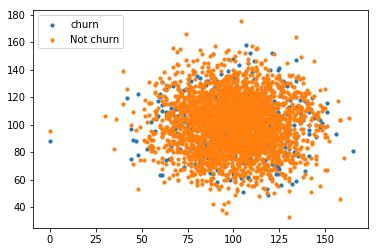

In [80]:
plt.scatter(churn.iloc[:, 6], churn.iloc[:, 12], s=10, label='churn')
plt.scatter(not_churn.iloc[:, 6], not_churn.iloc[:, 12], s=10, label='Not churn')
plt.legend()
plt.show()

In [79]:
not_churn.iloc[:, 6].head()

0    110
1    123
2    114
3     71
4    113
Name: total day calls, dtype: int64

In [120]:
featuress   = [x for x in df.columns.tolist() if x not in target_col]
(featuress)

['account length',
 'area code',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls']

In [91]:
summary = (df[[i for i in df.columns]].
           describe().transpose().reset_index())
summary = summary.rename(columns = {"index" : "feature"})
summary=np.around(summary,4)

In [92]:
#lets plot the summary of our dataframe
val_lst = [summary["feature"], summary["count"],
           summary["mean"],summary["std"],
           summary["min"], summary["25%"],
           summary["50%"], summary["75%"], summary["max"]]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ["#506784"]),
                                fill = dict(color = ["#119DFF"]),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ["#506784"]),
                                fill = dict(color = ["lightgrey","#F5F8FF"])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

In [144]:

#lets have a look at feature importance
from sklearn.ensemble import ExtraTreesClassifier
array=df_train.values
X = array[:,0:18]
Y = array[:,18]
model = ExtraTreesClassifier()
model.fit(X, Y)
x=pd.DataFrame(model.feature_importances_)
y=pd.DataFrame(featuress)
frames = [y,x]
res=pd.concat(frames,axis=1)
res.columns=["features","importance"]
res.reset_index(drop=True)

C:\Users\shars\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,features,importance
0,account length,0.035211
1,area code,0.024868
2,international plan,0.078076
3,voice mail plan,0.022992
4,number vmail messages,0.015737
5,total day minutes,0.112468
6,total day calls,0.037779
7,total day charge,0.127776
8,total eve minutes,0.070243
9,total eve calls,0.030567


In [146]:
#we can see that "total day minutes","total day charges" and "nummber customer service calls" are the most important features
#now we will standardize numerical values inside columns as a part of data preprocessing,first lets have a look at data types
df_train.dtypes

account length                     int64
area code                           int8
international plan                  int8
voice mail plan                     int8
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                               int8
dtype: object

In [147]:
#we can see every column has been converted into numerical,now we are ready to standardize our data
from sklearn.preprocessing import StandardScaler

In [150]:
std = StandardScaler()
scaledtrain = std.fit_transform(df_train[num_cols])
scaledtest = std.fit_transform(df_test[num_cols])
scaledtrain = pd.DataFrame(scaledtrain,columns=num_cols)
scaledtest = pd.DataFrame(scaledtest,columns=num_cols)

C:\Users\shars\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\shars\Miniconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\shars\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\shars\Miniconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [152]:
#dropping original values merging scaled values for numerical columns
df_train = df_train.drop(columns = num_cols,axis = 1)
df_train = df_train.merge(scaledtrain,left_index=True,right_index=True,how = "left")

In [153]:
df_test = df_test .drop(columns = num_cols,axis = 1)
df_test  = df_test .merge(scaledtest,left_index=True,right_index=True,how = "left")

In [160]:
cols=['area code',
 'international plan',
 'voice mail plan',
 'account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls','Churn']


In [158]:
#rearrange columns
df_train=df_train[cols]
df_test=df_test[cols]

In [161]:
#lets look at standardized data
df_train.head()

,area code,international plan,voice mail plan,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,1,0,1,0.676489,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,0
1,1,0,1,0.149065,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,0
2,1,0,0,0.902529,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,0
3,0,1,0,-0.428590,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,0
4,1,1,0,-0.654629,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,0


In [163]:
#lets checkout the  correlation between predictor variables and visualize it.
#correlation
correlation = df_train.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [165]:
#by looking at above plot we can determine high correlation between some variables
#voice mail plan - number vmail messages =0.9569
#total day charges - total day minutes = 1.0
#total eve charges - total eve minutes = 1.0
#total night charges - total night minutes = 1.0
#total intl charges - total intl minutes = 1.0

#so we have to drop some of these to remove high correlation in our data
df_train=df_train.drop(["total day charge","total eve charge","total night charge","total intl charge"],axis=1)
df_test=df_test.drop(["total day charge","total eve charge","total night charge","total intl charge"],axis=1)

In [168]:
df_train=df_train.drop(["voice mail plan"],axis=1)
df_test=df_test.drop(["voice mail plan"],axis=1)

In [169]:
#now we will again check correlation
correlation = df_train.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

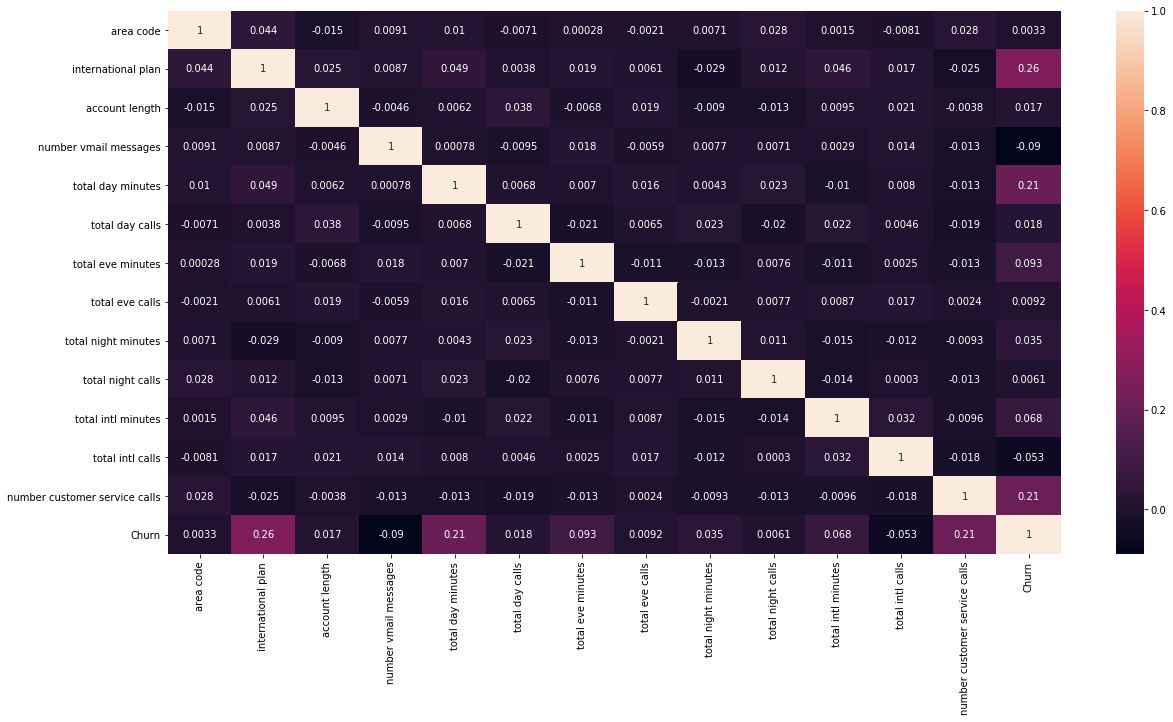

In [173]:
#now we can see there are no high correlation present ..
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(df_train,show_chart=True)

In [175]:
#Correlation of independent variables with dependent variable "Churn"
show_correlations(df_train, show_chart=False)["Churn"].sort_values(ascending=False)

Churn                            1.000000
international plan               0.259852
number customer service calls    0.208750
total day minutes                0.205151
total eve minutes                0.092796
total intl minutes               0.068239
total night minutes              0.035493
total day calls                  0.018459
account length                   0.016541
total eve calls                  0.009233
total night calls                0.006141
area code                        0.003256
total intl calls                -0.052844
number vmail messages           -0.089728
Name: Churn, dtype: float64

<Figure size 1440x720 with 0 Axes>

In [176]:
#now lets play with models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#Function attributes
#dataframe     - processed dataframe
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf - ["coefficients","features"](cooefficients for logistic 
                                 #regression,features for tree based models)

#threshold_plot - if True returns threshold plot for model

In [225]:
cols    = [i for i in df_train.columns if i not in target_col]
train_X = df_train[cols]
train_Y = df_train[target_col]
test_X  = df_test[cols]
test_Y  = df_test[target_col]


Churn    True
Name: 1, dtype: bool

In [248]:
#function for model building and visualize its parameters

def telecom_churn_prediction(algorithm,training_x,testing_x,training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    
    print(conf_matrix)
    TP = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    TN = conf_matrix[1][1]
    print("True Positives = ",TP)
    print("False Positives = ",FP)
    print("True Negatives = ",TN)
    print("False Negatives = ",FN)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
     #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
   


In [249]:
#MODEL 1    logistic Regression model
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      1443
           1       0.58      0.18      0.28       224

   micro avg       0.87      0.87      0.87      1667
   macro avg       0.73      0.58      0.60      1667
weighted avg       0.84      0.87      0.84      1667

Accuracy   Score :  0.8722255548890222
[[1413   30]
 [ 183   41]]
True Positives =  1413
False Positives =  30
True Negatives =  41
False Negatives =  183
Area under curve :  0.5811228467478466 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



C:\Users\shars\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [186]:
#we can see the recall rate for churn is very low, and also false negative rate is high,although accuracy is good but we are intrested in recalling churn rate.
#this is due to the fact that our data is imbalanced.
#lets use SMOTE approach to balance and model our data by oversampling the minority class.
#Synthetic Minority Oversampling TEchnique (SMOTE)
from imblearn.over_sampling import SMOTE

In [191]:
cols    = [i for i in df_train.columns if i not in target_col]
smote_train_X=df_train[cols]
smote_train_Y=df_train[target_col]
smote_test_X =df_test[cols]
smote_test_Y =df_test[target_col]

1667

In [192]:
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)

C:\Users\shars\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [194]:
os_smote_Y.shape[0] 

5700

In [196]:
os_smote_Y["Churn"].value_counts() 

1    2850
0    2850
Name: Churn, dtype: int64

In [251]:
#we have balanced the data , now lets build the model
#MODEL 2  Logistic Regression SMOTE

logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
telecom_churn_prediction(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.78      0.86      1443
           1       0.36      0.79      0.49       224

   micro avg       0.78      0.78      0.78      1667
   macro avg       0.66      0.79      0.68      1667
weighted avg       0.88      0.78      0.81      1667

Accuracy   Score :  0.7792441511697661
[[1121  322]
 [  46  178]]
True Positives =  1121
False Positives =  322
True Negatives =  178
False Negatives =  46
Area under curve :  0.785748316998317 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



C:\Users\shars\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [254]:
#Applying knn algorithm to smote oversampled data.
def telecom_churn_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    TP = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    TN = conf_matrix[1][1]
    print("True Positives = ",TP)
    print("False Positives = ",FP)
    print("True Negatives = ",TN)
    print("False Negatives = ",FN)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
     
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "picnic",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [255]:
#MODEL 3 KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
telecom_churn_prediction_alg(knn,os_smote_X,test_X,
                             os_smote_Y,test_Y,threshold_plot = True)

C:\Users\shars\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.78      0.85      1443
           1       0.31      0.63      0.42       224

   micro avg       0.76      0.76      0.76      1667
   macro avg       0.62      0.71      0.63      1667
weighted avg       0.85      0.76      0.79      1667

Accuracy Score   :  0.7606478704259149
True Positives =  1126
False Positives =  317
True Negatives =  142
False Negatives =  82
Area under curve :  0.7071236758736759


In [256]:
#MODEL 4 #aussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)

telecom_churn_prediction_alg(gnb,os_smote_X,test_X,os_smote_Y,test_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

 Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      1443
           1       0.43      0.75      0.54       224

   micro avg       0.83      0.83      0.83      1667
   macro avg       0.69      0.80      0.72      1667
weighted avg       0.88      0.83      0.85      1667

Accuracy Score   :  0.8308338332333534
True Positives =  1217
False Positives =  226
True Negatives =  168
False Negatives =  56
Area under curve :  0.7966909216909217


C:\Users\shars\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [257]:
#MODEL 5 Support Vector Machine

from sklearn.svm import SVC

#Support vector classifier
#using linear hyper plane
svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)


telecom_churn_prediction(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"coefficients",threshold_plot = False)

C:\Users\shars\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.76      0.85      1443
           1       0.35      0.82      0.49       224

   micro avg       0.77      0.77      0.77      1667
   macro avg       0.66      0.79      0.67      1667
weighted avg       0.88      0.77      0.80      1667

Accuracy   Score :  0.7696460707858428
[[1099  344]
 [  40  184]]
True Positives =  1099
False Positives =  344
True Negatives =  184
False Negatives =  40
Area under curve :  0.7915181665181665 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



In [203]:
#now we will see and compare Model Performances
#performance metrics
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df


In [205]:
#outputs for every model
model1 = model_report(logit,train_X,test_X,train_Y,test_Y,
                      "Logistic Regression(Baseline_model)")

model2 = model_report(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Logistic Regression(SMOTE)")

model3= model_report(knn,os_smote_X,test_X,os_smote_Y,test_Y,
                      "KNN Classifier")

model4= model_report(gnb,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Naive Bayes")

model5= model_report(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
                      "SVM Classifier Linear")

#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

model_performances=np.round(model_performances,4)

val_lst = [model_performances["Model"], model_performances["Accuracy_score"],
           model_performances["Recall_score"],model_performances[ "Precision"],
           model_performances["f1_score" ], model_performances[ "Area_under_curve"],
           model_performances["Kappa_metric"]]

trace  = go.Table(header = dict(values = model_performances.columns.tolist(),
                                line = dict(color = ['#506784']),align = ['left','center'],
                                fill = dict(color = ['#00cccc']),font = dict(color = '#333333', size = 13),
                                height = 30
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['black']),
                                fill = dict(color = ["lightgrey",'#F5F8FF']) ,
                                align = ['left', 'center'],
                                font = dict(color = '#506784', size = 13),
                                height = 30
                               ),
                  
                  columnwidth = [230,100,80,60,60,110,90])

layout = go.Layout(dict(title = "Model Performance Comparison"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)


C:\Users\shars\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\shars\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\shars\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\shars\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\shars\Miniconda3\lib\site-packages\sklearn\utils\validation

In [206]:
#function to Compare model metrics
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")
trace5  = output_tracer('Kappa_metric',"#FFCC99")

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

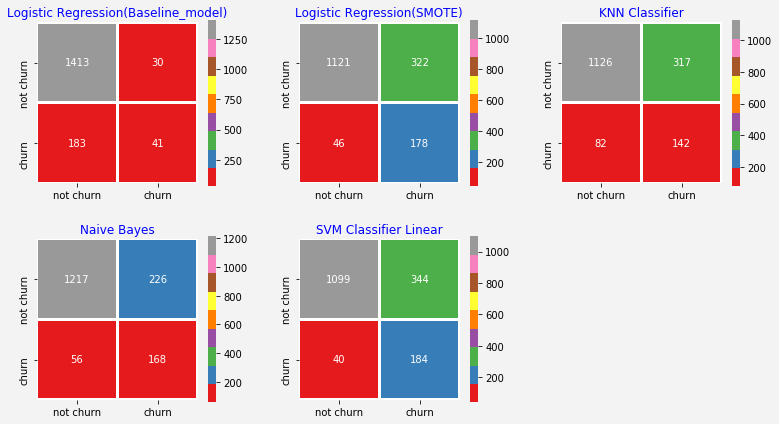

In [258]:
#lets compare confusion matrices for models

lst    = [logit,logit_smote,knn,gnb,svc_lin]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)','KNN Classifier',"Naive Bayes",
          'SVM Classifier Linear']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(test_X)
    conf_matrix = confusion_matrix(test_Y,predictions)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)